# Build a classifier: Predict species

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Get working directory
os.getcwd()

'C:\\Users\\Casper Damen\\DiP\\Python klasje\\notebooks'

In [4]:
#Set working directory
os.chdir('C:\\Users\\Casper Damen\\DiP\\Python klasje\\data')

In [5]:
#Load dataset
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

In [85]:
df.rename(columns={'SepalLengthCm': 'sepal_length'})

,Id,sepal_length,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [101]:
#Rename columns
def rename_columns(dataf):
    
    renamed_df = (dataf
                  .rename(columns={'SepalLengthCm': 'sepal_length',
                                   'SepalWidthCm' : 'sepal_width',
                                   'PetalLengthCm': 'petal_length',
                                   'PetalWidthCm' : 'petal_width',
                                   'Species' : 'species'}
                         )
                 )
    
    return renamed_df

def keep_columns(dataf):
    
    keep_columns_df = (dataf[['sepal_length', 
                              'sepal_width',
                              'petal_width',
                              'petal_length',
                              'species']]
                      )
        
    return keep_columns_df

In [102]:
clean_df = (df
            .pipe(rename_columns)
            .pipe(keep_columns)
           )

In [103]:
clean_df.head()

,sepal_length,sepal_width,petal_width,petal_length,species
0,5.1,3.5,0.2,1.4,Iris-setosa
1,4.9,3.0,0.2,1.4,Iris-setosa
2,4.7,3.2,0.2,1.3,Iris-setosa
3,4.6,3.1,0.2,1.5,Iris-setosa
4,5.0,3.6,0.2,1.4,Iris-setosa


## Data exploration

In [104]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [105]:
clean_df.describe()

,sepal_length,sepal_width,petal_width,petal_length
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,1.198667,3.758667
std,0.828066,0.433594,0.763161,1.764420
min,4.300000,2.000000,0.100000,1.000000
25%,5.100000,2.800000,0.300000,1.600000
50%,5.800000,3.000000,1.300000,4.350000
75%,6.400000,3.300000,1.800000,5.100000
max,7.900000,4.400000,2.500000,6.900000


In [106]:
clean_df.isna().sum()

sepal_length    0
sepal_width     0
petal_width     0
petal_length    0
species         0
dtype: int64

In [107]:
clean_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [108]:
sns.set_style("dark")

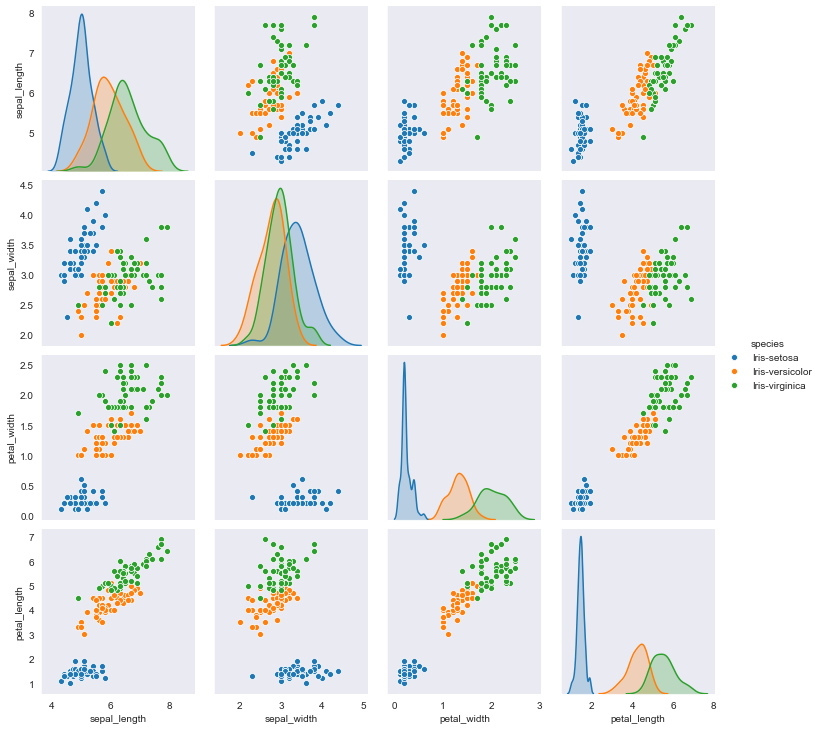

In [109]:
sns.pairplot(clean_df, hue='species');

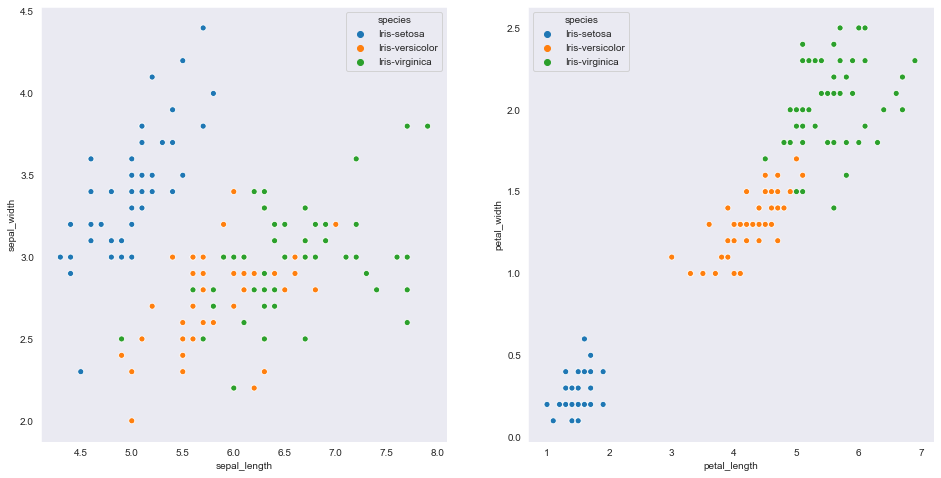

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

sns.scatterplot(x='sepal_length', y='sepal_width', data=clean_df, hue='species', ax=ax1)
sns.scatterplot(x='petal_length', y='petal_width', data=clean_df, hue='species', ax=ax2);

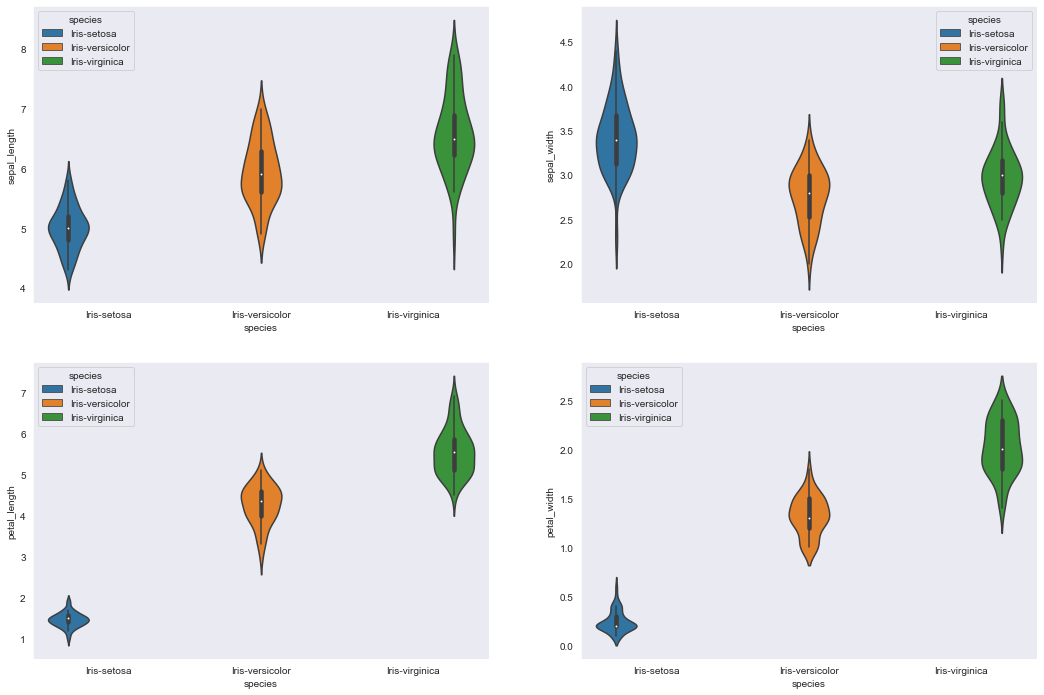

In [139]:
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2, 2, figsize=(18,12))

sns.violinplot(x='species', y='sepal_length', data=clean_df, hue='species', ax=ax1)
sns.violinplot(x='species', y='sepal_width', data=clean_df, hue='species', ax=ax2)
sns.violinplot(x='species', y='petal_length', data=clean_df, hue='species', ax=ax3)
sns.violinplot(x='species', y='petal_width', data=clean_df, hue='species', ax=ax4);

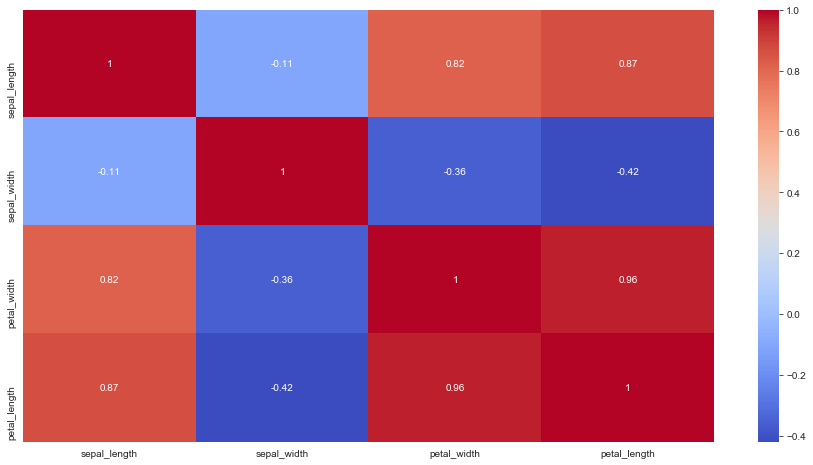

In [141]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])

sns.heatmap(clean_df.corr(),annot=True,cmap='coolwarm', ax=ax);

# Simple classifier
Based on mean petal width value

In [181]:
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [168]:
#Create dataframe with numeric predictor
#iris-setosa = 0, iris-versicolor=1, iris-verginica=2
def classifier_dataf(dataf):
    
    encode_cat = LabelEncoder()
    
    classifier_df = (dataf
                     .assign(species= encode_cat.fit_transform(dataf['species']))
                    )
    
    return classifier_df

In [169]:
#Create dataframe with species transformed to numeric
classifier_df = clean_df.pipe(classifier_dataf)

In [198]:
#Determine features and predictor 
X = classifier_df[['petal_width']]
y = classifier_df['species']

#Split dataframe in 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [206]:
#Use petal_width to determine species
def prediction_petal(X_test, X_train):

    predictions_df = X_test['petal_width'].apply(lambda x: 0 if (x < math.floor(X_train.mean())) else 
                                                          (2 if (x > math.ceil(X_train.mean())) else
                                                           1
                                                          )
                                                )
    return predictions_df

In [203]:
#Fit on training data and predict on test
y_pred = prediction_petal(X_test, X_train)

In [205]:
# Test accuracy Score
print(accuracy_score(y_pred, y_test))

0.868421052631579


# Random forest classifier

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
#Create classifier instance
rfc = RandomForestClassifier()

#Fit the classifier
rfc.fit(X_train, y_train)
    
#Make predictions 
y_pred = rfc.predict(X_test)

In [212]:
# Test accuracy Score
print(accuracy_score(y_pred, y_test))

1.0
